# EV Charging Duration Classification with Decision Trees

## Background
As electric vehicle (EV) adoption continues to grow globally, understanding charging behavior is critical for optimizing infrastructure, energy consumption, and user experience. This project explores global EV charging session data to classify the duration of a charging session as short, medium, or long using a decision tree classifier. By analyzing session-specific features such as battery capacity, temperature, and energy delivered, we aim to develop a simple, interpretable model that can support real-time decision-making at charging stations.

## Data
The dataset used is from Kaggle’s Global EV Charging Behavior 2024. It includes 800 charging sessions across various countries, with features such as:
- Battery Capacity (kWh)
- Energy Delivered (kWh)
- Charging Cost ($)
- Temperature (°C)
- Station Utilization Rate (%)
- Charging Duration (mins) (used to generate the target class)

A new categorical feature was created:  
- Duration Category: Short (≤ 60 mins), Medium (61–120 mins), Long (> 120 mins)

## Advantages
- Interpretable: Decision trees are easy to understand and visualize, making results explainable to non-technical stakeholders.
- No preprocessing of features required: Works natively with both numerical and categorical inputs.
- Fast and lightweight: Ideal for real-time systems at charging stations.

## Disadvantages
- Prone to overfitting: Without pruning or limiting depth, decision trees may capture noise.
- Limited generalization: Performance may not match that of more complex ensemble methods (e.g., Random Forests).
- No probabilistic output: Unlike logistic regression, predictions are discrete unless explicitly modified.

This notebook walks through the full pipeline from data loading and feature engineering to model training, evaluation, and visualization.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [20]:
df = pd.read_csv("Global_EV_Charging_Behavior_2024.csv")
df.head()

,Country,City,Charging Station ID,Charging Station Type,EV Model,Manufacturer,Battery Capacity (kWh),Charging Start Time,Charging End Time,Charging Duration (mins),Energy Delivered (kWh),Charging Cost ($),Payment Method,Temperature (°C),Charging Session Outcome,Station Utilization Rate (%)
0,Germany,Berlin,CS-8195,DC Fast,Hyundai Kona Electric,Hyundai,64,2025-03-31 18:13:40,2025-03-31 19:30:40,77,18.17,5.83,Subscription,30.7,Completed,57.2
1,USA,New York,CS-5103,DC Fast,Nissan Leaf,Nissan,40,2025-03-08 13:17:05,2025-03-08 14:27:05,70,13.14,3.69,Card,23.6,Failed,53.6
2,France,Lyon,CS-4527,Level 1,BYD Han,BYD,76,2025-01-21 20:08:51,2025-01-21 21:34:51,86,62.47,6.37,Subscription,11.9,Aborted,22.4
3,India,Mumbai,CS-5717,DC Fast,Nissan Leaf,Nissan,40,2025-04-04 21:11:29,2025-04-04 23:03:29,112,8.39,2.97,App,27.3,Failed,46.8
4,Germany,Munich,CS-5093,Level 2,Nissan Leaf,Nissan,40,2025-03-27 14:58:49,2025-03-27 17:34:49,156,15.26,4.40,Subscription,2.7,Completed,13.7


In [21]:
# read data and check for missing values
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       800 non-null    object 
 1   City                          800 non-null    object 
 2   Charging Station ID           800 non-null    object 
 3   Charging Station Type         800 non-null    object 
 4   EV Model                      800 non-null    object 
 5   Manufacturer                  800 non-null    object 
 6   Battery Capacity (kWh)        800 non-null    int64  
 7   Charging Start Time           800 non-null    object 
 8   Charging End Time             800 non-null    object 
 9   Charging Duration (mins)      800 non-null    int64  
 10  Energy Delivered (kWh)        800 non-null    float64
 11  Charging Cost ($)             800 non-null    float64
 12  Payment Method                800 non-null    object 
 13  Tempe

Country                         0
City                            0
Charging Station ID             0
Charging Station Type           0
EV Model                        0
Manufacturer                    0
Battery Capacity (kWh)          0
Charging Start Time             0
Charging End Time               0
Charging Duration (mins)        0
Energy Delivered (kWh)          0
Charging Cost ($)               0
Payment Method                  0
Temperature (°C)                0
Charging Session Outcome        0
Station Utilization Rate (%)    0
dtype: int64

In [22]:
def duration_category(mins):
    if mins <= 60:
        return 'Short'
    elif mins <= 120:
        return 'Medium'
    else:
        return 'Long'

df["Duration Category"] = df["Charging Duration (mins)"].apply(duration_category)
df["Duration Category"].value_counts()


Long      300
Medium    266
Short     234
Name: Duration Category, dtype: int64

In [23]:
features = ["Battery Capacity (kWh)", "Energy Delivered (kWh)", "Charging Cost ($)",
            "Temperature (°C)", "Station Utilization Rate (%)"]
X = df[features]    # input features we want the model to learn from 
y = df["Duration Category"]    # labels we're trying to predict 


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# split into 70% train; 30% test 


In [25]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)   # create decision tree with limited depth 
clf.fit(X_train, y_train)   # train the model on training data 
y_pred = clf.predict(X_test)   # predict on test set 


Accuracy: 0.4

Classification Report:
               precision    recall  f1-score   support

        Long       0.42      0.81      0.55        97
      Medium       0.30      0.19      0.23        74
       Short       0.60      0.04      0.08        69

    accuracy                           0.40       240
   macro avg       0.44      0.35      0.29       240
weighted avg       0.43      0.40      0.32       240



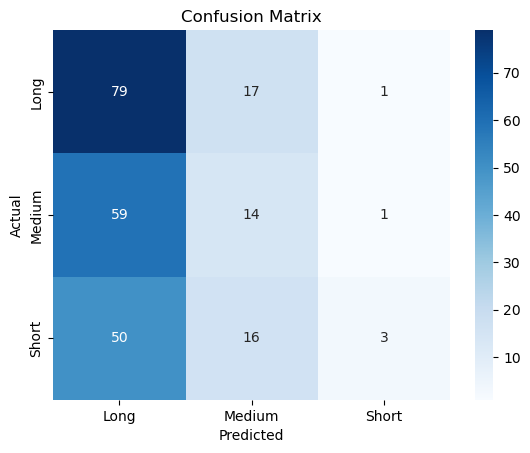

In [26]:
# check how the model performed on the test set 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


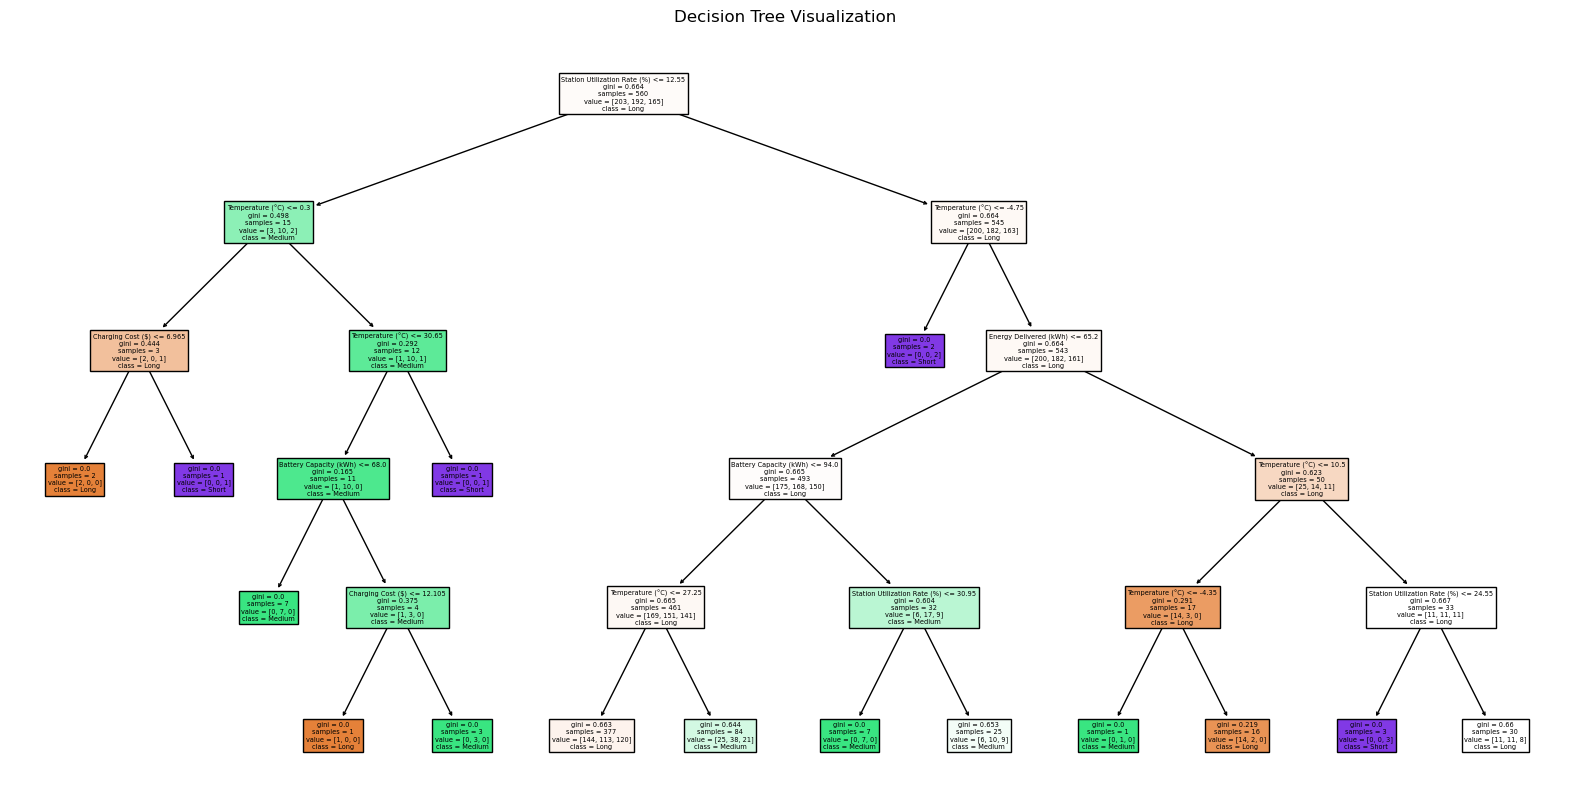

In [27]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=features, class_names=clf.classes_)
plt.title("Decision Tree Visualization")
plt.show()


## Results:
- We built a Decision Tree model to classify charging durations into short, medium, or long.
- The classifications are clearly shown in color, with purple being short, green being medium, and the earth tones being long. 
- Further improvements could include:
  - Encoding categorical features (EV Model, City, etc.)
  
